### Measures of Similarity

In this notebook, you will get some practice working with different measures of similarity.  The goal of this notebook is to assist you in calculating these different measures in python, as well as understanding how these measures might be impacted based on the data you will see in the real world.  

In the following notebook in this lesson, you will be doing more to apply these measures to real data. 

**Intro:** Read in the libraries needed to complete this notebook.

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from scipy.stats import pearsonr
from sklearn.metrics import jaccard_score
from sklearn.metrics.pairwise import cosine_similarity

%matplotlib inline

**Question 1:** Using the built in scipy stats `pearsonr` function, calculate the correlation between `user_1` and `user_2` defined below.

In [ ]:
import data_solution_part1 as sp

user_1 = np.array([3, 2, 1, 8, 8, 9])
user_2 = np.array([4, 1, 2, 10, 10, 9])

your_answer = # correlation coefficient here

sp.answer_one(your_answer)

**Question 2:** Based on the correlation coefficient acheived in the previous question, what is true about thee relationship between `user_1` and `user_2`?

In [ ]:
a = "user_1 and user_2 have a negative, linear relationship"
b = "user_1 and user_2 have no real relationship"
c = "user_1 and user_2 have a positive, linear relationship"
d = "it is impossible to tell the type of relationship just from one number"

your_answer = #a

sp.answer_two(your_answer)

**Question 3:** Use sklearn to calculate the `cosine_similarity` between `user_1` and `user_2`.  

**Hint:** If you get an error, use the error message to assist with your solution.  Remember your solution should be a single value, not an array of values.

In [ ]:
from sklearn.metrics.pairwise import cosine_similarity

user_1 = np.array([3, 2, 1, 8, 8, 9])
user_2 = np.array([4, 1, 2, 10, 10, 9])

your_answer = # cosine similarity here

sp.answer_three(your_answer)

**Question 4:** By changing the two vectors being compared, you can actually show provide the same Pearson correlation coefficient and cosine similarity.  Which of the below is the transformation that is needed to create equality?

In [ ]:
a = "Subtract the mean from each vector"
b = "Divide by the standard deviation from each vector"
c = "Subtract the standard deviation from each vector"
d = "Subtract the mean and divide by the standard deviation from each vector"
e = "None of the above"

your_answer = #a

sp.answer_four(your_answer)

**Use the below cell to perform the transformation above, and show that the cosine similarity and pearson correlation coefficient are equal.**

In [ ]:
user_1 = np.array([3, 2, 1, 8, 8, 9])
user_2 = np.array([4, 1, 2, 10, 10, 9])

user_1_transformed = #transform user 1
user_2_transformed = #transform user 2

# these should match
print("The pearson correlation is: {}".format(np.round(pearsonr(user_1, user_2)[0], 8)))
print("The cosine similarity using the transformed is: {}".format(np.round(cosine_similarity(user_1_transformed.reshape(1, -1), user_2_transformed.reshape(1, -1))[0][0], 8)))    

The unfortunate part of the data that is acheived from the movietweetings ratings (and many applications in the real world) is that most individuals haven't interacted with all the same items.  Therefore, to compute the correlation between two individual's, we have to make sure they have ratings in overlapping movies.

The measures of correlation and cosine similarity therefore do not always work well in practice - as these measures tend to work well when users have rated a lot of items, and these ratings overlap with other users some of whom are similar to them.

**Question 5:** Use the below to find the value of the correlation coefficient when a `nan` is present in one or both of two vectors being compared.

In [ ]:
user_1 = np.array([3, 2, 1, 8, 8, 9])
user_2 = np.array([4, 1, 2, 10, np.nan, 9])

your_answer = # correlation coefficient

sp.answer_five(your_answer)

**Question 6:** Fill in the function below that takes in two vectors, finds and removes the indices where at least one is `nan`.  Use your new function to compute the correlation between the `user_1` and `user_2` vectors that contain `nan`s.

In [ ]:
user_1 = np.array([3, 2, 1, 8, 8, 9])
user_2 = np.array([4, 1, 2, 10, np.nan, 9])

def compute_correl(vec1, vec2):
    '''
    inputs:
    vec1 - np.array
    vec2 - np.array
    
    return:
    pearson correlation between two vectors where indices with a nan in 
    either vector are removed from both vectors
    '''
    

    return pearsonr(vec1, vec2)[0]

your_answer = compute_correl(user_1, user_2)

sp.answer_six(your_answer)

In [ ]:
# additional test
x = np.array([3, 2, np.nan, 8, np.nan, 9])
y = np.array([np.nan, 1, 2, 10, np.nan, 9])

assert sp.compute_correl_2(x,y) == compute_correl(x,y)

In order to compute the **jaccard** measure of similarity, you need to look at the overlapping ratings between two users divided by the total ratings across both users.  In the image below, the purple represents this ratio.

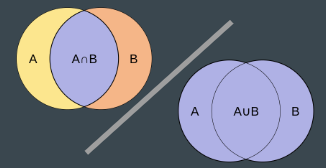

**Question 7:** Fill in the function below to compute the jaccard similarity between two vectors.  Using `x` and `y`, you can test if your function works for these two examples.

In [ ]:
x = np.array([3, 2, np.nan, 8, np.nan, 9])
y = np.array([np.nan, 1, 2, 10, np.nan, 9])

def compute_jaccard(vec1, vec2):
    '''
    inputs:
    vec1 - np.array
    vec2 - np.array
    
    return:
    jaccard similarity computed between vec1 and vec2 
    '''
    
    return # return jaccard similarity

your_solution = compute_jaccard(x, y)

sp.answer_seven(your_solution)

Here you can see if your solution matches the built in.

In [ ]:
from sklearn.metrics import jaccard_score
x_new = np.where(np.isnan(x), 0, 1)
y_new = np.where(np.isnan(y), 0, 1)

# these should match
print("Your score is: {}".format(compute_jaccard(x, y)))
print("The built in score is: {}".format(jaccard_score(x_new, y_new)))

Here is another test of if your solution matches the built in.

In [ ]:
x = np.array([np.nan, 1, 2, 10, np.nan, 9, 2, 3, 4, 1, np.nan, np.nan, np.nan])
y = np.array([3, 2, np.nan, 8, np.nan, 9, 3, 2, np.nan, 8, np.nan, 9, 10])
x_new = np.where(np.isnan(x), 0, 1)
y_new = np.where(np.isnan(y), 0, 1)

# these should match
print("Your score is: {}".format(compute_jaccard(x, y)))
print("The built in score is: {}".format(jaccard_score(x_new, y_new)))